# Algoritmos de Clasificación 8 Clases Morfológicas

## Declaración de Librerías

In [1]:
# mlp for the two circles problem with batchnorm before activation function
import keras
from sklearn.datasets import make_circles
from keras.models import Sequential
from keras.layers import Dense, Flatten, Dropout
from keras.layers import Activation
from keras.layers import BatchNormalization
from keras_preprocessing.image import ImageDataGenerator
from keras.optimizers import SGD, Adam
from keras.metrics import categorical_crossentropy
from keras.layers.convolutional import *
from matplotlib import pyplot
from zipfile import ZipFile
import os
import numpy as np
import io
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib import pyplot
from PIL import Image
import time
import shutil
from google.colab import files
import glob
import cv2 as cv
from google.colab.patches import cv2_imshow
from os import walk
from keras.models import Model

## Upload de las imágenes y preparación de los directorios

In [2]:
# Subimos las imágenes con las que prepararemos nuestro dataset
uploaded = files.upload()

Saving NGCClassification.zip to NGCClassification.zip


In [3]:
# Creación del directorio donde descomprimiremos nuestro dataset
!mkdir /content/datangc/

In [4]:
# Extraemos las imágenes del fichero que hemos subido
# Dataset para Clasificación de Galaxias según 'E','I','S0a','Sab', 'Sb', 'Sbc', 'Scd', 'Sdm'
with ZipFile('NGCClassification.zip', 'r') as zipObj:
# Dataset para Clasificación de Galaxias según S,E,I
#with ZipFile('NGC3Class.zip', 'r') as zipObj:
#with ZipFile('NGCIAC149.zip', 'r') as zipObj:
#with ZipFile('NGC_1.zip', 'r') as zipObj:
   zipObj.extractall('datangc')

In [5]:
# Verificamos que se haya descomprimido correctamente
os.listdir('/content/datangc/Train')

['Sdm', 'Scd', 'Sab', 'E', 'Sbc', 'S0a', 'Sb', 'I']

## Lectura y Visualización de imágenes

In [ ]:
# Procedemos a la lectura de las imágenes y su nombre de fichero para añadirlo 
# a dos listas, lo usaremos por si queremos verificar y ver las imágenes
path = glob.glob("/content/datangc/Train/Sb/*.jpg")
cv_img = []
name_file = []
for img in path:
    name_file.append(img)
    n = cv.imread(img)
    cv_img.append(n)

In [ ]:
# Verificamos las dimensiones de las imágenes
cv_img[0].shape

(160, 160, 3)

In [ ]:
# Creamos las variables necesarias para posteriormente poder graficas las 
# imágenes extraídas
Tot = len(cv_img)
Cols = 6
Rows = Tot // Cols 
Rows += Tot % Cols
Position = range(1,Tot + 1)

labels=[]
for numimages in range(len(cv_img)):
  namefile = name_file[numimages]
  labels.append(namefile[14:len(namefile)-4])
  labels.append(name_file[numimages])
labels
classes = len(labels)
labels

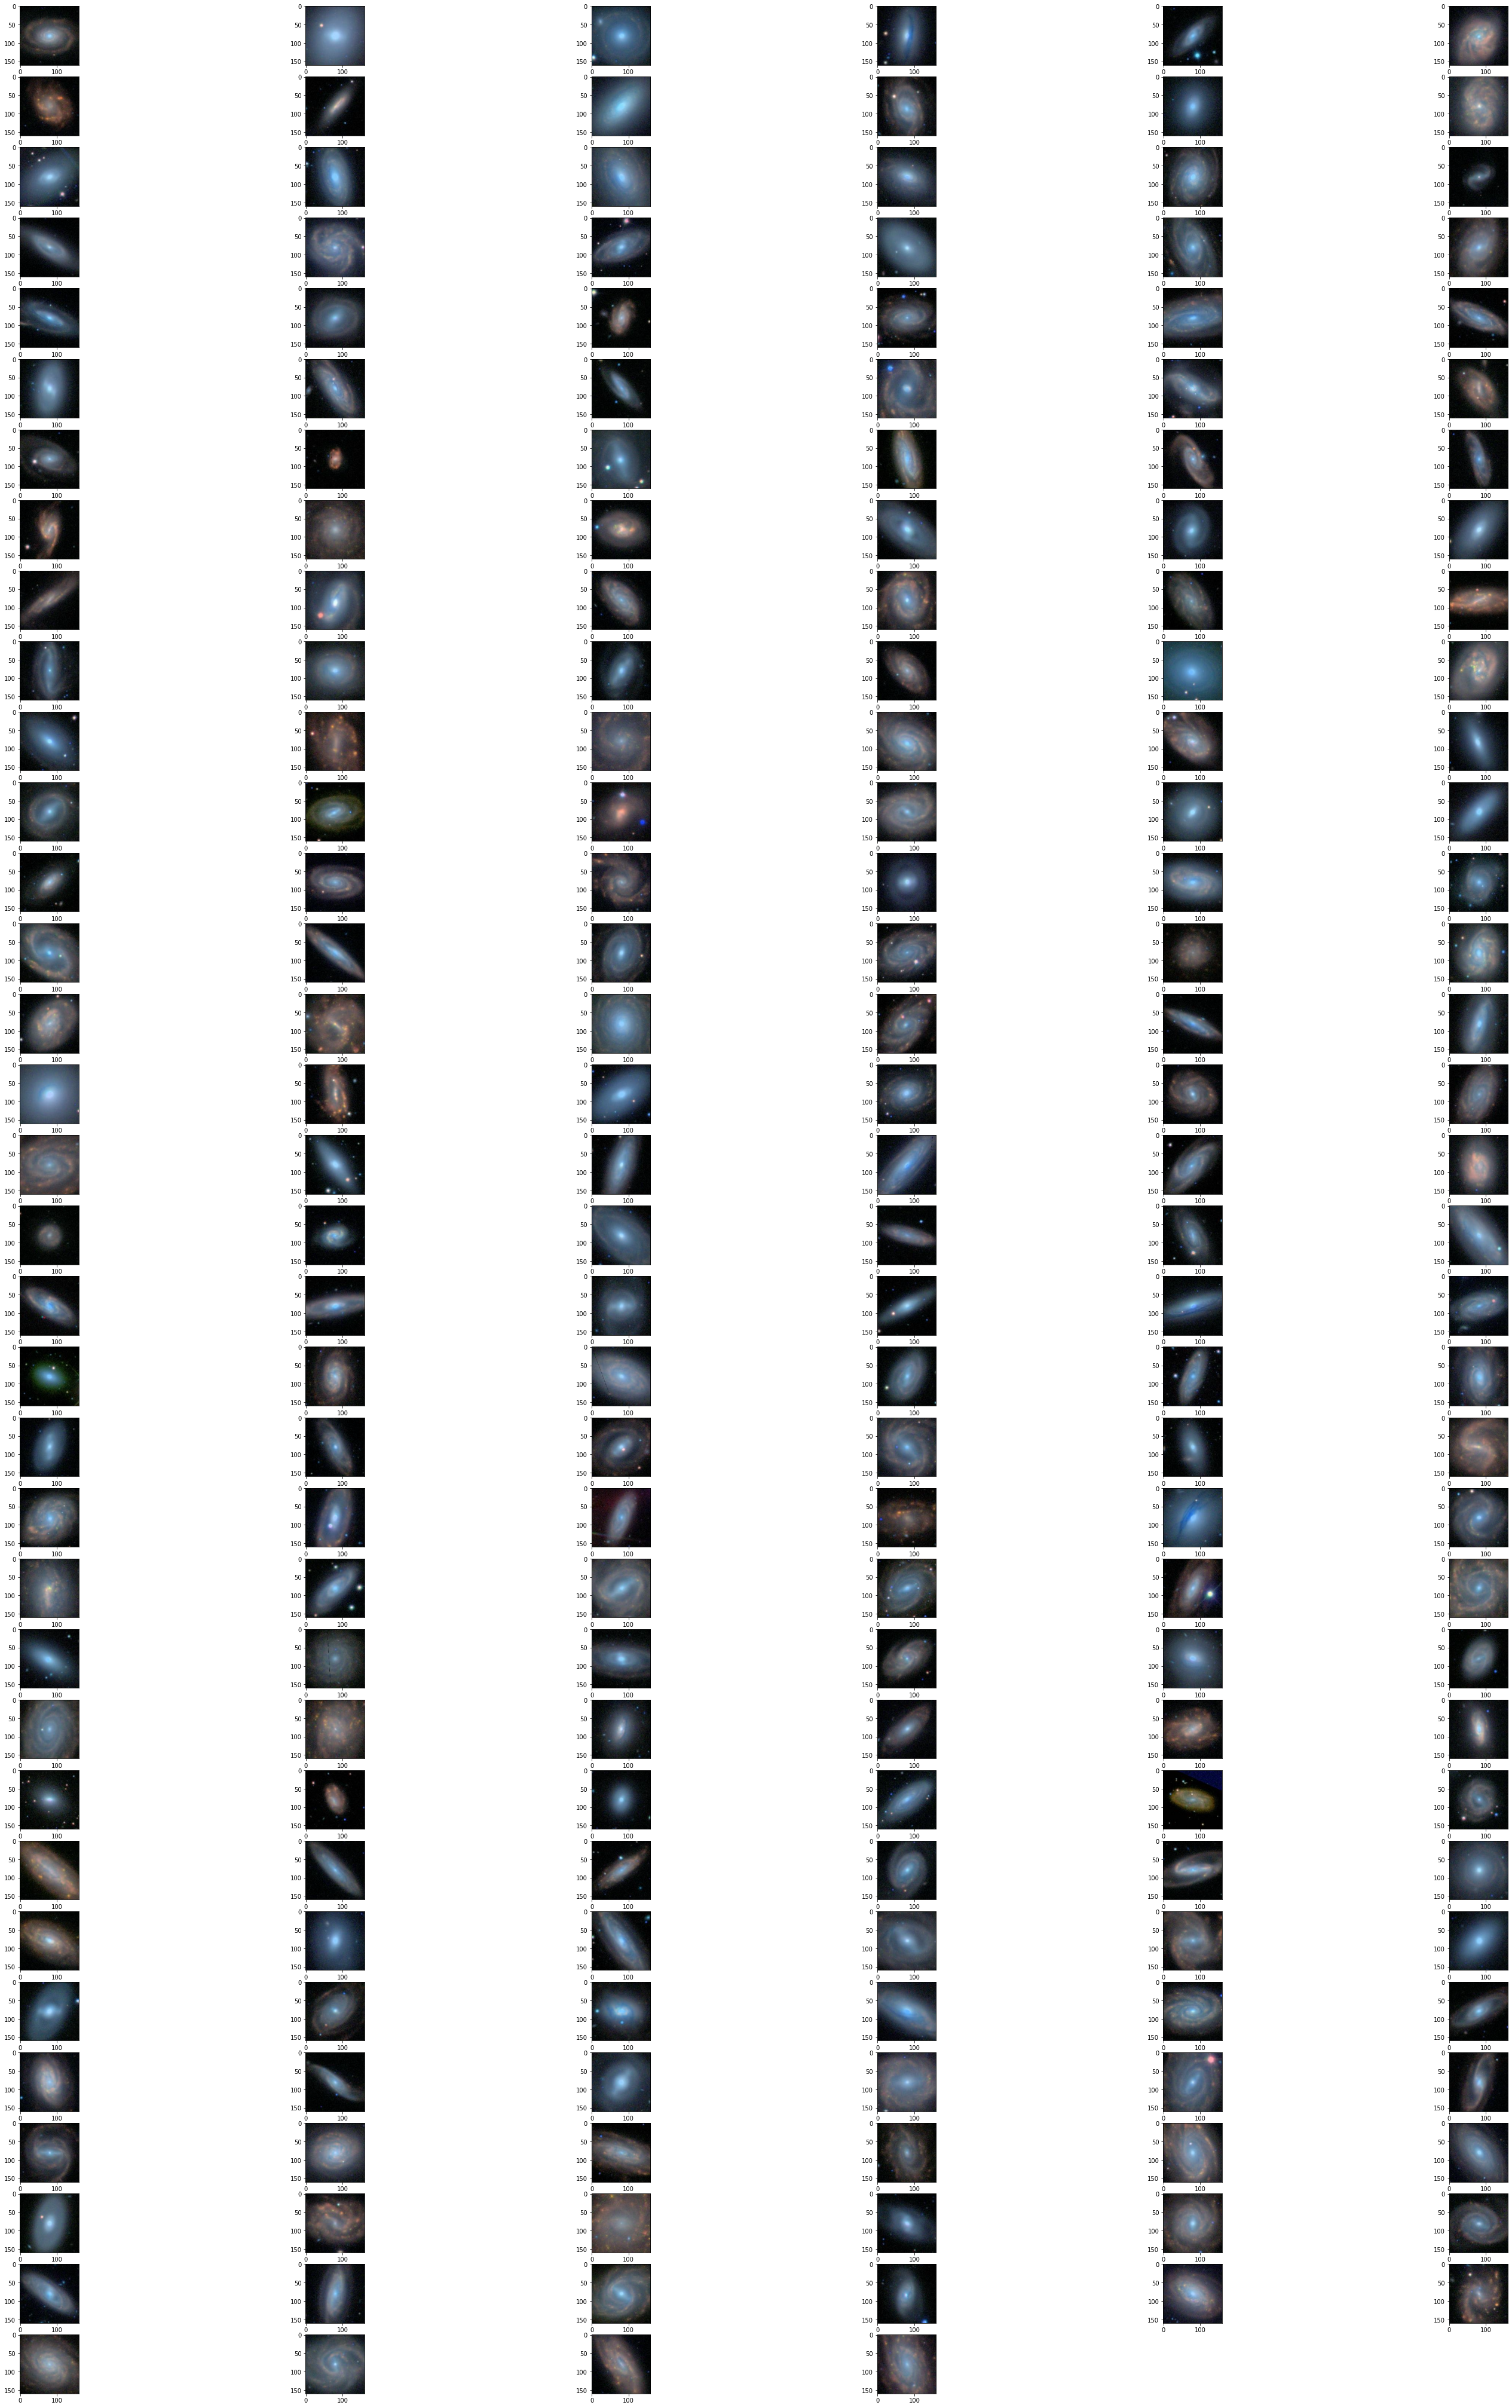

In [ ]:
# Sacamos por pantalla las imágenes que hemos leído
plt.figure(figsize=(50, 80))
#plt.xticks([]),plt.yticks([])
fig = plt.figure(1)

for k in range(Tot):
  ax = fig.add_subplot(Rows,Cols,Position[k])
  ax.imshow(cv_img[k])      
plt.show()

## Preparamos los Algoritmos de entrenamiento dependiendo el caso de estudio - Redes Neuronales Convolucionales (CNN)


1.   Dataset de Clasificación con 3 Clases Elípticas, Espirales e Irregulares
2.   Dataset de Clasificación con 8 Clases 'E','I','S0a','Sab', 'Sb', 'Sbc', 'Scd', 'Sdm'
3.   Dataset con tantas clases como imágenes de Galaxias 
4. Dataset preparado para realizar Redes Siamesas



In [6]:
# Establecemos los directorios donde tendremos las imágenes de Train, Test y Valid
train_path = '/content/datangc/Train'
test_path = '/content/datangc/Test'
valid_path = '/content/datangc/Valid'

Estas labels son necesarias para los dos primeros casos de estudio Clasificaciones con 3 y 8 clases:

In [7]:
labels=['E','I','S0a','Sab', 'Sb', 'Sbc', 'Scd', 'Sdm']
#labels=['E','S','I']

Preparamos los directorios en este caso tenemos las Clases definidas:

In [8]:
train_batches = ImageDataGenerator().flow_from_directory(train_path, target_size=(160,160), classes=labels, batch_size=20)
test_batches = ImageDataGenerator().flow_from_directory(test_path, target_size=(160,160), classes=labels, batch_size=20)
valid_batches = ImageDataGenerator().flow_from_directory(valid_path, target_size=(160,160), classes=labels, batch_size=20)

Found 266 images belonging to 8 classes.
Found 60 images belonging to 8 classes.
Found 61 images belonging to 8 classes.


En caso de no tener definidas las clases como son el resto de casos utilizaremos la preparación de directorios siguiente:

In [ ]:
train_batches = ImageDataGenerator().flow_from_directory(train_path, target_size=(160,160), batch_size=20)
test_batches = ImageDataGenerator().flow_from_directory(test_path, target_size=(160,160), batch_size=20)
valid_batches = ImageDataGenerator().flow_from_directory(valid_path, target_size=(160,160), batch_size=20)

Found 1349 images belonging to 150 classes.
Found 600 images belonging to 150 classes.
Found 600 images belonging to 150 classes.


### Preparación de las Arquitecturas para el entrenamiento de Algoritmos de cada caso de estudio:

ARQUITECTURA PARA EL ENTRENAMIENTO DE ALGORITMOS DEL CASO DE ESTUDIO 1 - CLASIFICACIÓN CON 8 CLASES ('E','I','S0a','Sab', 'Sb', 'Sbc', 'Scd', 'Sdm')

In [ ]:
arqmodel = Sequential()
arqmodel.add(Conv2D(32, kernel_size=(3,3), strides=(1,1), activation='relu', input_shape=(160,160,3)))
arqmodel.add(Conv2D(32, kernel_size=(3,3), strides=(1,1), activation='relu', input_shape=(160,160,3)))
arqmodel.add(MaxPooling2D(pool_size=(2,2)))
arqmodel.add(Dropout(0.25))
arqmodel.add(Conv2D(32, kernel_size=(3,3), strides=(1,1), activation='relu', input_shape=(160,160,3)))
arqmodel.add(Conv2D(32, kernel_size=(3,3), strides=(1,1), activation='relu', input_shape=(160,160,3)))
arqmodel.add(MaxPooling2D(pool_size=(2,2)))
arqmodel.add(Dropout(0.25))
arqmodel.add(Flatten())
arqmodel.add(Dense(len(labels), activation='softmax'))
arqmodel.summary()

# Compilamos el modelo para añadirle los parámetros de optimización, pérdida y 
# la métrica de accuracy
arqmodel.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adam(),
              #optimizer=sgd,
              #optimizer=keras.optimizers.Adadelta(),
              #optimizer=keras.optimizers.RMSprop(),
              metrics=['accuracy']
)

# Y entrenamos el modelo, para ello hemos fijado los siguientes parámetros y para 
# poder realizar el entrenamiento con unos valores adecuados utilizamos Google Collab con GPUs
arqmodel.fit(
  train_batches, 
  steps_per_epoch = 4,
  validation_data = valid_batches,
  validation_steps = 4,
  epochs = 40,
  verbose=2
)


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 158, 158, 32)      896       
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 156, 156, 32)      9248      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 78, 78, 32)        0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 78, 78, 32)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 76, 76, 32)        9248      
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 74, 74, 32)        9248      
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 37, 37, 32)       

In [9]:
# Este modelo ha sido usado para probar varias arquitecturas, de momento es usada
# la anterior por dar mejores resultados
arqmodel2 = Sequential()
arqmodel2.add(Conv2D(32, kernel_size=(3,3), strides=(1,1), activation='relu', input_shape=(160,160,3)))
arqmodel2.add(Conv2D(32, kernel_size=(3,3), strides=(1,1), activation='relu', input_shape=(160,160,3)))
arqmodel2.add(MaxPooling2D(pool_size=(2,2)))
arqmodel2.add(Dropout(0.25))
arqmodel2.add(Flatten())
arqmodel2.add(Dense(len(labels), activation='softmax'))
arqmodel2.summary()

# Compilamos el modelo para añadirle los parámetros de optimización, pérdida y 
# la métrica de accuracy
arqmodel2.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adam(),
              #optimizer=sgd,
              #optimizer=keras.optimizers.Adadelta(),
              #optimizer=keras.optimizers.RMSprop(),
              metrics=['accuracy']
)

# Y entrenamos el modelo, para ello hemos fijado los siguientes parámetros y para 
# poder realizar el entrenamiento con unos valores adecuados utilizamos Google Collab con GPUs
arqmodel2.fit(
  train_batches, 
  steps_per_epoch = 4,
  validation_data = valid_batches,
  validation_steps = 4,
  epochs = 40,
  verbose=2
)


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 158, 158, 32)      896       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 156, 156, 32)      9248      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 78, 78, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 78, 78, 32)        0         
_________________________________________________________________
flatten (Flatten)            (None, 194688)            0         
_________________________________________________________________
dense (Dense)                (None, 8)                 1557512   
Total params: 1,567,656
Trainable params: 1,567,656
Non-trainable params: 0
______________________________________________

## Evaluación de resultados

### Procedemos a guardar y bajar el modelo para poderlo usar posteriormente sin necesidad de entrenarlo de nuevo.

In [ ]:
arqmodel.save("arqmodel_CLASS3_1.h5py")
download = files.download('arqmodel_CLASS3_1.h5py')

INFO:tensorflow:Assets written to: arqmodel_CLASS3_1.h5py/assets


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Evaluamos los datos de test

In [10]:
# Finalmente evaluamos el modelo con los datos de Test
arqmodel2.evaluate(test_batches)

3/3 [==============================] - 1s 174ms/step - loss: 5.2339 - accuracy: 0.3833


[5.233874797821045, 0.38333332538604736]

Comparamos el accuracy y el loss de los datos de training y de validación.

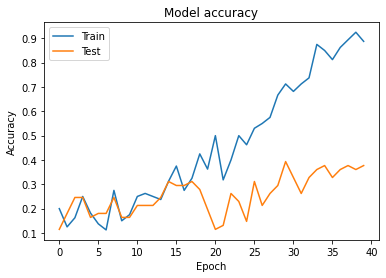

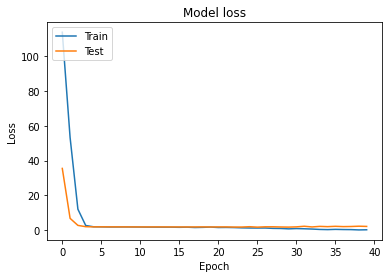

In [ ]:
# Accuracy
plt.plot(fit_result.history['accuracy'])
plt.plot(fit_result.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Loss
plt.plot(fit_result.history['loss'])
plt.plot(fit_result.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

Realizamos predicciones del modelo y estudiamos primeros resultados

In [ ]:
# Prediccion en las primeras 50 imagenes de test
predictions = arqmodel.predict(test_batches)

# Mostramos las predicciones de nuestro modelo.
print(np.argmax(predictions, axis=1))

[0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1
 1 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1]


### Pruebas Varias

In [ ]:
# labels=['E','S','I'] 0,1,2
#imgtest = cv.imread('/content/datangc/Train/I/NGC0014_SDSS.jpg') # NO OK
#imgtest = cv.imread('/content/datangc/Train/I/UGC06181_SDSS.jpg') # OK 
#imgtest = cv.imread('/content/datangc/Train/S/CGCG536-030_SDSS.jpg') # OK
#imgtest = cv.imread('/content/datangc/Train/S/NGC0165_SDSS.jpg') # OK
#imgtest = cv.imread('/content/datangc/Train/S/NGC2604_SDSS.jpg') # OK
#imgtest = cv.imread('/content/datangc/Train/E/NGC0426_SDSS.jpg') 
imgtest = cv.imread('/content/datangc/Train/E/NGC2880_SDSS.jpg') 

img1 = np.expand_dims(imgtest, 0)
imgtest

In [ ]:
imgtest = cv.imread('/content/datangc/Train/I/NGC0014_SDSS.jpg') # NO OK
imgtest1 = cv.imread('/content/datangc/Train/I/UGC06181_SDSS.jpg') # OK 
imgtest2 = cv.imread('/content/datangc/Train/S/CGCG536-030_SDSS.jpg') # OK
imgtest3 = cv.imread('/content/datangc/Train/S/NGC0165_SDSS.jpg') # OK
imgtest4 = cv.imread('/content/datangc/Train/Sbc/NGC5520_SDSS.jpg') # OK
imgtest5 = cv.imread('/content/datangc/Train/E/NGC0426_SDSS.jpg') 
imgtest6 = cv.imread('/content/datangc/Train/E/NGC2880_SDSS.jpg') 
imgtest7 = cv.imread('/content/datangc/Train/Sbc/NGC5016_SDSS.jpg') 
imgtest8 = cv.imread('/content/datangc/Train/Sb/NGC2487_SDSS.jpg')
imgtest9 = cv.imread('/content/datangc/Train/Sab/NGC7311_SDSS.jpg') 
imgtest10 = cv.imread('/content/datangc/Train/Sab/NGC0160_SDSS.jpg')
imgtest11 = cv.imread('/content/datangc/Train/Sbc/NGC7466_SDSS.jpg') 
imgtest12 = cv.imread('/content/datangc/Train/Sbc/NGC2596_SDSS.jpg')


In [ ]:
imgtest = cv.imread('galax_0_3868.jpg')
imgtest1 = cv.imread('galax_0_3884.jpg')
imgtest2 = cv.imread('galax_0_333.jpg')
imgtest3 = cv.imread('galax_0_2050.jpg')

imgtest5 = cv.imread('galax_0_171.jpg')
imgtest6 = cv.imread('galax_0_563.jpg')
imgtest7 = cv.imread('galax_0_204.jpg')
imgtest8 = cv.imread('galax_0_989.jpg')




img1 = np.expand_dims(imgtest, 0)
img2 = np.expand_dims(imgtest1, 0)
img3 = np.expand_dims(imgtest2, 0)
img4 = np.expand_dims(imgtest3, 0)


In [ ]:
imgtest4

In [ ]:
# Prediccion en las primeras 50 imagenes de test
predictions = arqmodel.predict(img1)

# Mostramos las predicciones de nuestro modelo.
print(np.argmax(predictions, axis=1))

[0]


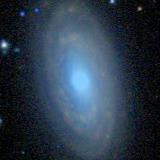

In [ ]:
Image.fromarray(imgtest9)

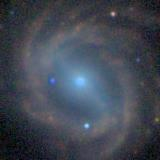

In [ ]:
Image.fromarray(imgtest8)

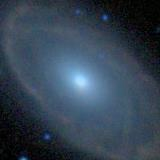

In [ ]:
Image.fromarray(imgtest10)

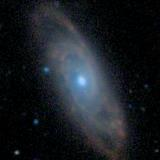

In [ ]:
Image.fromarray(imgtest11)

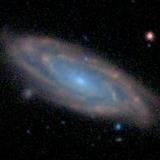

In [ ]:
Image.fromarray(imgtest12)

In [ ]:
from keras.models import Model
layerdropout = Model(inputs=arqmodel2.input, outputs=arqmodel2.get_layer("dense").output)

In [ ]:
layerdropout.compile(loss=keras.losses.categorical_crossentropy, optimizer=keras.optimizers.Adam(), metrics=['accuracy'])

In [ ]:
arqmodel2.output_names[0]

'dense_3'

In [ ]:
img = np.expand_dims(imgtest,0)
uno = layerdropout.predict(img)

In [ ]:
arqmodel2(img)

<tf.Tensor: shape=(1, 8), dtype=float32, numpy=
array([[9.7882462e-01, 2.1175420e-02, 7.1372645e-23, 2.2595855e-34,
        1.8217876e-20, 7.8192196e-23, 3.0892799e-09, 6.6427957e-31]],
      dtype=float32)>

In [ ]:
uno

array([[9.7882462e-01, 2.1175420e-02, 7.1372645e-23, 2.2595855e-34,
        1.8217876e-20, 7.8192196e-23, 3.0892799e-09, 6.6427957e-31]],
      dtype=float32)

In [ ]:
img = np.expand_dims(imgtest1,0)
dos = layerdropout.predict(img)

In [ ]:
img = np.expand_dims(imgtest2,0)
tres = layerdropout.predict(img)

In [ ]:
img = np.expand_dims(imgtest4,0)
cuatro = layerdropout.predict(img)

In [ ]:
img = np.expand_dims(imgtest5,0)
cinco = layerdropout.predict(img)

In [ ]:
img = np.expand_dims(imgtest6,0)
seis = layerdropout.predict(img)

In [ ]:
img = np.expand_dims(imgtest7,0)
siete = layerdropout.predict(img)

In [ ]:
img = np.expand_dims(imgtest8,0)
ocho = layerdropout.predict(img)

In [ ]:
img = np.expand_dims(imgtest9,0)
nueve = layerdropout.predict(img)

In [ ]:
img = np.expand_dims(imgtest10,0)
diez = layerdropout.predict(img)

In [ ]:
img = np.expand_dims(imgtest11,0)
once = layerdropout.predict(img)

In [ ]:
img = np.expand_dims(imgtest12,0)
doce = layerdropout.predict(img)

In [ ]:
np.linalg.norm(tres-uno)

176.04396

In [ ]:
np.linalg.norm(nueve-dos)

141.62517

In [ ]:
np.linalg.norm(tres-cuatro)

190.38416

In [ ]:
np.linalg.norm(doce-cuatro)

0.46413165

In [ ]:
np.linalg.norm(nueve-ocho)

0.9508847

In [ ]:
np.linalg.norm(nueve-siete)

0.81316704

In [ ]:
np.linalg.norm(once-ocho)

0.56373864

In [ ]:
np.linalg.norm(nueve-diez)

0.4542655

In [ ]:
np.linalg.norm(once-doce)

0.01873699

In [ ]:
shutil.rmtree('/content/dataNGC/')

In [ ]:
os.listdir('/content/dataNGC')

[]

### A continuacion procedemos a cargar las imágenes que usaremos para establecer el ranking de similitud según la morfología de la Galaxia

In [11]:
name = []
frame = []
for (path, ficheros, archivos) in walk("/content/datangc/Train/Sbc"):
#    print(path)
#    print(ficheros)
    
 #   print(archivos)
    for file in archivos:
      frame.append(cv.imread(os.path.join(path, file)))
      name.append(os.path.join(path, file))

In [17]:
layerdropout = Model(inputs=arqmodel2.input, outputs=arqmodel2.get_layer(arqmodel2.output_names[0]).output)
#layerdropout = Model(inputs=arqmodel.input, outputs=arqmodel.get_layer('dropout_3').output)
layerdropout.compile(loss=keras.losses.categorical_crossentropy, optimizer=keras.optimizers.Adam(), metrics=['accuracy'])

In [18]:
results = []
for l in range(len(frame)):
  results.append(layerdropout.predict(np.expand_dims(frame[l],0)))

In [25]:
import math
data = []
for i in range(len(results)):
  dist = np.sqrt(np.sum((results[23]-results[i])**2))
  data = data + [[dist, str(name[i])[27:-4]]]
data.sort
print(data)

[[1.4020994, 'MCG-01-10-019_SDSS'], [0.011546429, 'KUG0210-078_SDSS'], [1.3942951, 'NGC2540_SDSS'], [1.4024366, 'NGC5980_SDSS'], [0.011776237, 'NGC0001_SDSS'], [1.4024369, 'NGC1659_SDSS'], [1.4024373, 'NGC5622_SDSS'], [1.3998784, 'IC0208_SDSS'], [1.3947974, 'NGC5520_SDSS'], [1.4024372, 'IC1528_SDSS'], [1.4007156, 'NGC5205_SDSS'], [1.297652, 'NGC1093_SDSS'], [0.02264361, 'NGC2347_SDSS'], [1.4010174, 'NGC6132_SDSS'], [1.4024371, 'NGC6063_SDSS'], [0.011776238, 'NGC0976_SDSS'], [0.9766565, 'NGC3811_SDSS'], [0.011754524, 'NGC2906_SDSS'], [0.011733733, 'NGC2543_SDSS'], [1.4019406, 'NGC7321_SDSS'], [0.028799664, 'NGC0214_SDSS'], [0.011776238, 'NGC5145_SDSS'], [0.03139659, 'NGC0551_SDSS'], [0.0, 'NGC7466_SDSS'], [1.4024373, 'NGC4711_SDSS'], [0.9303853, 'NGC5657_SDSS'], [1.3958567, 'NGC3994_SDSS'], [0.81570065, 'NGC3614_SDSS'], [1.4024373, 'NGC5633_SDSS'], [0.7260635, 'NGC5720_SDSS'], [1.3982967, 'NGC5735_SDSS'], [1.1449238, 'NGC2596_SDSS'], [0.61097836, 'NGC5320_SDSS'], [0.010973426, 'NGC4185_

In [26]:
# Import pandas library 
import pandas as pd 
  
# Create the pandas DataFrame 
df = pd.DataFrame(data, columns = ['Distance', 'Galaxy']) 
df = df.sort_values(by=['Distance'])

In [27]:
df.head(50)

Distance              Galaxy
23  0.000000        NGC7466_SDSS
50  0.010758    KUG1349+143_SDSS
33  0.010973        NGC4185_SDSS
41  0.011514        NGC6394_SDSS
1   0.011546    KUG0210-078_SDSS
51  0.011631        NGC2780_SDSS
18  0.011734        NGC2543_SDSS
17  0.011755        NGC2906_SDSS
4   0.011776        NGC0001_SDSS
15  0.011776        NGC0976_SDSS
43  0.011776        NGC7047_SDSS
47  0.011776        NGC6032_SDSS
21  0.011776        NGC5145_SDSS
12  0.022644        NGC2347_SDSS
20  0.028800        NGC0214_SDSS
22  0.031397        NGC0551_SDSS
36  0.090880        NGC6004_SDSS
32  0.610978        NGC5320_SDSS
29  0.726063        NGC5720_SDSS
38  0.794513        NGC2916_SDSS
27  0.815701        NGC3614_SDSS
25  0.930385        NGC5657_SDSS
16  0.976656        NGC3811_SDSS
31  1.144924        NGC2596_SDSS
45  1.155976        NGC3913_SDSS
11  1.297652        NGC1093_SDSS
48  1.337360  MCG-01-09-006_SDSS
42  1.340701        NGC5016_SDSS
37  1.368476  MCG+10-17-007_SDSS
2   1.394295        NGC2540_SDSS
8   1.394797        NGC5520_SDSS
26  1.395857        NGC3994_SDSS
44  1.397007        NGC1667_SDSS
39  1.397135        NGC2253_SDSS
30  1.398297        NGC5735_SDSS
7   1.399878         IC0208_SDSS
40  1.399943        NGC4047_SDSS
10  1.400716        NGC5205_SDSS
34  1.400718        NGC5000_SDSS
13  1.401017        NGC6132_SDSS
19  1.401941        NGC7321_SDSS
0   1.402099  MCG-01-10-019_SDSS
52  1.402373        NGC6301_SDSS
3   1.402437        NGC5980_SDSS
5   1.402437        NGC1659_SDSS
14  1.402437        NGC6063_SDSS
46  1.402437        NGC0477_SDSS
9   1.402437         IC1528_SDSS
28  1.402437        NGC5633_SDSS
24  1.402437        NGC4711_SDSS

In [28]:
img = []
img.append(cv.imread('/content/datangc/Train/Sbc/NGC7466_SDSS.jpg'))
img.append(cv.imread('/content/datangc/Train/Sbc/KUG1349+143_SDSS.jpg'))
img.append(cv.imread('/content/datangc/Train/Sbc/NGC4185_SDSS.jpg'))
img.append(cv.imread('/content/datangc/Train/Sbc/NGC6394_SDSS.jpg'))
img.append(cv.imread('/content/datangc/Train/Sbc/KUG0210-078_SDSS.jpg'))
img.append(cv.imread('/content/datangc/Train/Sbc/NGC2780_SDSS.jpg'))

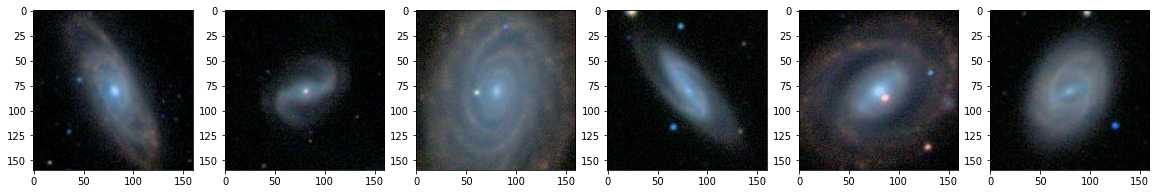

In [29]:
# Sacamos por pantalla las imágenes que hemos leído
plt.figure(figsize=(20, 30))
#plt.xticks([]),plt.yticks([])
fig = plt.figure(1)
l = (1,2,3,4,5,6)
for k in l:
  ax = fig.add_subplot(1,6,k)
  k = k -1
  ax.imshow(img[k])      
plt.show()

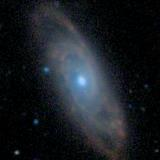

In [ ]:
Image.fromarray(frame[8])

In [ ]:
str(name[8])[27:-4]

'NGC7466_SDSS'